In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [22]:
import numpy as np 
import pandas as pd
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets,transforms
from torch.utils.data.dataloader import DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 


In [ ]:
!unzip ../input/aerial-cactus-identification/train.zip

In [23]:
!unzip ../input/aerial-cactus-identification/test.zip

Archive:  ../input/aerial-cactus-identification/test.zip
   creating: test/
  inflating: test/000940378805c44108d287872b2f04ce.jpg  
  inflating: test/001ee6d8564003107853118ab87df407.jpg  
  inflating: test/0036e44a7e8f7218e9bc7bf8137e4943.jpg  
  inflating: test/0059dfa41de4441fc23b9a4b98ba99cb.jpg  
  inflating: test/008d9fce71c8e03a4c9cdd15ea908573.jpg  
  inflating: test/00e20b0e6d779e7c36cea29710eed88e.jpg  
  inflating: test/00feb0be23ac80f397a55b0ed8502def.jpg  
  inflating: test/0127044dfc88dfaed0118c8764909800.jpg  
  inflating: test/01a840130560403d291c6b7cb3ed6cf3.jpg  
  inflating: test/01c77430f6e5062bfde2427cdd312a39.jpg  
  inflating: test/01cd51bb115fe5c0c37acd8d8800613e.jpg  
  inflating: test/01e890418e216253bf5339ee4c96b65e.jpg  
  inflating: test/02203be3c4fce1e83c3fa6693c0dea39.jpg  
  inflating: test/022092850a5d17c77ccfab20e8ceb651.jpg  
  inflating: test/024b35ae8ae64039f3d5fcda7886e1cc.jpg  
  inflating: test/02b072147b3c4c01b823a760366616be.jpg  
  inflating:

  inflating: test/447d9b3a062d64b601adc86dea93029b.jpg  
  inflating: test/44864ccc753c809260df01d34345ac2f.jpg  
  inflating: test/44b4613691af60e45282d350c8d7e29c.jpg  
  inflating: test/4530bee4f5367c2f0009c0fd4e4b13c0.jpg  
  inflating: test/45725e3cf4a09eb27e754bcc2ff33252.jpg  
  inflating: test/457a0614f51a4b0b9161233628075244.jpg  
  inflating: test/45acb04ac6aed60da503d1351403d1b2.jpg  
  inflating: test/45d5a98a7ef91eee33cb0ab9f1789cb8.jpg  
  inflating: test/45ec2bfecdfbb0c1177ef98c6bcf9e61.jpg  
  inflating: test/4643669cc8cab79366a45be05174f316.jpg  
  inflating: test/465f1c04097539bf502ab18597583fb7.jpg  
  inflating: test/4710ab9f97a832ffce271162c34af1f8.jpg  
  inflating: test/4723c3835d75510f110c8bcf7d5f5294.jpg  
  inflating: test/473092a0da5428e94d09b76e5bb3814e.jpg  
  inflating: test/477bc3da91b798a442a9185c17fcce47.jpg  
  inflating: test/47cb415ec8901c4bb67f06e3d9abd5c2.jpg  
  inflating: test/47f1abdeb9c507d7ba887add6d42da4d.jpg  
  inflating: test/48ab2707b50e7

  inflating: test/1158c70cd837a4c49b83717634aaf889.jpg  
  inflating: test/11aeffe9322b563d49183c769a2ddb2a.jpg  
  inflating: test/11ba416e7c559e93b349363fc745eceb.jpg  
  inflating: test/12041d125ece8db437a58e464c9c959f.jpg  
  inflating: test/12c643d6bafdc0848ad150aadb1a9e57.jpg  
  inflating: test/131cb3635d16a7b2374361d627114f66.jpg  
  inflating: test/13699a14d9971e4fd914b30ad208e57c.jpg  
  inflating: test/13727454d1eb9db0db00db45b3a8a5fe.jpg  
  inflating: test/14224917324cf801e9e9eb9092513060.jpg  
  inflating: test/144b2da4a326f8a5dc11412e7e77b97c.jpg  
  inflating: test/170a71fc2927df94f9f64bcf214b9fe7.jpg  
  inflating: test/172556a700ab6200f74078c2a919e62b.jpg  
  inflating: test/174ec9f5ac243d1f39a3b18991f42a80.jpg  
  inflating: test/1760224fbdc3fcb4853009685c4625fd.jpg  
  inflating: test/177695258cd77d3b3e98337e16c32fab.jpg  
  inflating: test/17d4c17f7aba97451114d330bc20137f.jpg  
  inflating: test/18555b61fc59d27ba18e4b35cf9b9c06.jpg  
  inflating: test/18f9d60636e3b

  inflating: test/e299f2f3a167b3b87140a724edd5a5ce.jpg  
  inflating: test/e2ddc11426abf1d69a32946bf9ab4c2a.jpg  
  inflating: test/e32764fa3820fe8d80794f5053d076e0.jpg  
  inflating: test/e3ac52b0f7d6e6488f26a49b2b8581a5.jpg  
  inflating: test/e3d1e1b38264c74a2f9b4aab9398d5c0.jpg  
  inflating: test/e41385cf2734eb853c3103cb8c11a4aa.jpg  
  inflating: test/e4212c6c1d16735a90dbc69e6fb29690.jpg  
  inflating: test/e421d581be3b4c2e280a26dfec37e7b1.jpg  
  inflating: test/e42c6ed84889ea1c31947db94781bfc7.jpg  
  inflating: test/e43b0f272e0d5ff7aaf0812738331643.jpg  
  inflating: test/e4baa78cb9dd7da0d19aaf13496a2204.jpg  
  inflating: test/e4bcf2c421ebce50fd6cea79285c5dbe.jpg  
  inflating: test/e4e7025d1092d94e0dd023759c085025.jpg  
  inflating: test/e534d0a2ef2ef04d56d554b0fcbe1864.jpg  
  inflating: test/e57e0398dc8d9245fb3dd2b58ead9ae1.jpg  
  inflating: test/e5bd18f9217f37b4480526b0d1e5779a.jpg  
  inflating: test/e63cfc5dca64791d57e9496d039843bc.jpg  
  inflating: test/e641380817e16

  inflating: test/b2f8ac34bea9e0c7891304ec1074dac2.jpg  
  inflating: test/b39ad9577e7ac50768378cabc5d9bbab.jpg  
  inflating: test/b40bc89803e48bf03c42be495fc3ba78.jpg  
  inflating: test/b488384fd709f8aa236cf897cc441078.jpg  
  inflating: test/b4b74a6e2fe9fcc4db923acc954b3560.jpg  
  inflating: test/b4c10b6fa5e66cce7c7157ead349b0ec.jpg  
  inflating: test/b5d10241a3f230aaf3780b172296b40e.jpg  
  inflating: test/b5f083a8d8b197dc195ee712d1325caf.jpg  
  inflating: test/b680d991274865e831f1feb8e84f67f3.jpg  
  inflating: test/b68c6a8fd6c70aec4ff6da82d218827c.jpg  
  inflating: test/b6e3fffc5c358ad65556d575db2fb317.jpg  
  inflating: test/b6e575d07dfe72c4747be9b304c4052a.jpg  
  inflating: test/b6f40999384523ae51e26a2ff79dbab6.jpg  
  inflating: test/b736b2fa8ceefe993389187d32571843.jpg  
  inflating: test/b75dd715aeebd93eefa6569bc74bfe04.jpg  
  inflating: test/b775dde226fd724c69910cb138bdf3e2.jpg  
  inflating: test/b7c053bfdceeca3801d052fdbd883334.jpg  
  inflating: test/b7defe4ffed65

  inflating: test/8cc3ec1d77d2455ac84158547e6dcaa0.jpg  
  inflating: test/8d120f360aa9a973d33ce8a84baedee7.jpg  
  inflating: test/8d5970b9d4fd45cfe3cd8a4ccd5ab693.jpg  
  inflating: test/8d888e336266dad17ee365c374cc3bda.jpg  
  inflating: test/8dd41e4e62b3709ce3c8a7a0677048bb.jpg  
  inflating: test/8dec6a7c1b726586dc4b045beb6326f2.jpg  
  inflating: test/8e425481f4b358384f0b53ea96e7df1f.jpg  
  inflating: test/8e7f72db70eb0758316c05cc1722567d.jpg  
  inflating: test/8ec1b92f380967f22775bb8894029fe6.jpg  
  inflating: test/8edc10d1996a4b019bc6504dea610fdf.jpg  
  inflating: test/8ee5816d39a8dd18eb72b14a9f7ea476.jpg  
  inflating: test/8ef7d70a4d9fb1b8e2c0ab5c76bde017.jpg  
  inflating: test/8f06135ad220ec3a6d7a370fc28402d2.jpg  
  inflating: test/90069a6e085313645e88823d02cc0dca.jpg  
  inflating: test/9019183d727a1a5d0aa76796afdd1563.jpg  
  inflating: test/902f8a69f3942e75dc79150f7db22ecc.jpg  
  inflating: test/90d13556546da94f1b2a5238dcc5c225.jpg  
  inflating: test/90e56839614da

In [25]:
import os
os.getcwd()
labels = pd.read_csv('../input/aerial-cactus-identification/train.csv')

train_path = './train'
test_path = './test'

In [26]:
labels.head()
label = 'Has Cactus', 'Hasn\'t Cactus'
labels['has_cactus'].value_counts()


1    13136
0     4364
Name: has_cactus, dtype: int64

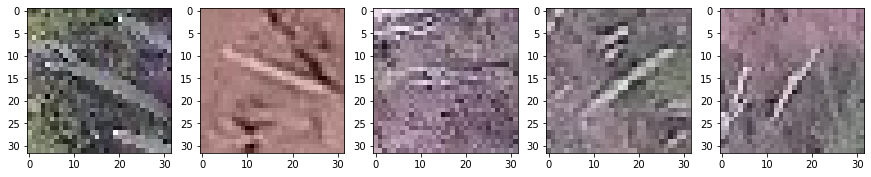

In [27]:
import matplotlib.image as img
fig,ax = plt.subplots(1,5,figsize = (15,3))

for i,idx in enumerate(labels[labels['has_cactus'] == 1]['id'][-5:]):
    path = os.path.join(train_path,idx)
    ax[i].imshow(img.imread(path))

In [35]:
import matplotlib.pyplot as plt
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

def imshow(image, ax=None, title=None, normalize=True):
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

In [36]:
train_transform = transforms.Compose([transforms.ToPILImage(),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean,std)])

test_transform = transforms.Compose([transforms.ToPILImage(),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean,std)])

valid_transform = transforms.Compose([transforms.ToPILImage(),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean,std)])

In [41]:
train, valid_data = train_test_split(labels, stratify=labels['has_cactus'], test_size=0.2)


In [42]:
class CactiDataset():
    def __init__(self, data, path , transform = None):
        super().__init__()
        self.data = data.values
        self.path = path
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self,index):
        img_name,label = self.data[index]
        img_path = os.path.join(self.path, img_name)
        image = img.imread(img_path)
        if self.transform is not None:
            image = self.transform(image)
        return image, label
    
train_data = CactiDataset(train, train_path, train_transform )
valid_data = CactiDataset(valid_data, train_path, valid_transform )


In [43]:
num_epochs = 35
num_classes = 2
batch_size = 25
learning_rate = 0.001

In [45]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device


device(type='cuda', index=0)

In [47]:
train_loader = DataLoader(dataset = train_data, batch_size = batch_size, shuffle=True, num_workers=0)
valid_loader = DataLoader(dataset = valid_data, batch_size = batch_size, shuffle=False, num_workers=0)


training images
torch.Size([3, 32, 32])


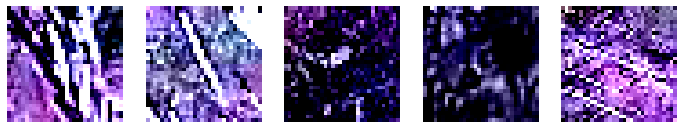

In [48]:
#data after pre processing
trainimages, trainlabels = next(iter(train_loader))

fig, axes = plt.subplots(figsize=(12, 12), ncols=5)
print('training images')
for i in range(5):
    axe1 = axes[i] 
    imshow(trainimages[i], ax=axe1, normalize=False)

print(trainimages[0].size())

In [49]:
class CNN(nn.Module): 
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=3)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=3)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(720, 1024)
        self.fc2 = nn.Linear(1024, 2)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(x.shape[0],-1)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return x

In [50]:
model = CNN()
print(model)

CNN(
  (conv1): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=720, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=2, bias=True)
)


In [51]:
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)

In [ ]:
%%time
train_losses = []
valid_losses = []

for epoch in range(1, num_epochs + 1):
    train_loss = 0.0
    valid_loss = 0.0
    
    model.train()
    for data, target in train_loader:
        data = data.to(device)
        target = target.to(device)
        
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * data.size(0)
        
    model.eval()
    for data, target in valid_loader:
        
        data = data.to(device)
        target = target.to(device)
        
        output = model(data)
        
        loss = criterion(output, target)
        
        valid_loss += loss.item() * data.size(0)
    
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(valid_loader.sampler)
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
        
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))

Epoch: 1 	Training Loss: 0.176993 	Validation Loss: 0.085012
Epoch: 2 	Training Loss: 0.104500 	Validation Loss: 0.079798
Epoch: 3 	Training Loss: 0.085517 	Validation Loss: 0.060021
Epoch: 4 	Training Loss: 0.077164 	Validation Loss: 0.060155
Epoch: 5 	Training Loss: 0.070792 	Validation Loss: 0.061352
Epoch: 6 	Training Loss: 0.064247 	Validation Loss: 0.064963
Epoch: 7 	Training Loss: 0.056314 	Validation Loss: 0.049138
Epoch: 8 	Training Loss: 0.057843 	Validation Loss: 0.046513
Epoch: 9 	Training Loss: 0.056464 	Validation Loss: 0.045598
Epoch: 10 	Training Loss: 0.050375 	Validation Loss: 0.050741
Epoch: 11 	Training Loss: 0.049164 	Validation Loss: 0.034191
Epoch: 12 	Training Loss: 0.042136 	Validation Loss: 0.036826
Epoch: 13 	Training Loss: 0.047809 	Validation Loss: 0.051464
Epoch: 14 	Training Loss: 0.042814 	Validation Loss: 0.036446
Epoch: 15 	Training Loss: 0.040157 	Validation Loss: 0.048373
Epoch: 16 	Training Loss: 0.039836 	Validation Loss: 0.042773
Epoch: 17 	Traini

In [ ]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in valid_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
          
    print('Test Accuracy of the model: {} %'.format(100 * correct / total))
